In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook", "grid", "dark_background"])

In [17]:

def construct_vandermonde_matrix(x, degree):
    """
    Manually construct the Vandermonde matrix for the given x values and polynomial degree.
    
    Parameters:
    - x: 1D numpy array of x coordinates of the data points.
    - degree: Degree of the polynomial.
    
    Returns:
    - Vandermonde matrix as a 2D numpy array.
    """
    n = len(x)
    A = np.zeros((n, degree + 1))
    for i in range(n):
        for j in range(degree + 1):
            A[i, j] = x[i] ** j
    return A

def least_squares_fit(x, y, degree):
    """
    Fit a polynomial of a given degree to the data points (x, y) using the least squares method,
    constructing and solving the system of equations manually.
    
    Parameters:
    - x: 1D numpy array of x coordinates.
    - y: 1D numpy array of y coordinates.
    - degree: Degree of the polynomial.
    
    Returns:
    - coeffs: Coefficients of the fitted polynomial.
    """
    # Construct the Vandermonde matrix
    A = construct_vandermonde_matrix(x, degree)
    
    # Compute A^T A and A^T y
    ATA = A.T.dot(A)
    ATy = A.T.dot(y)
    
    # Solve for the coefficients
    coeffs = np.linalg.solve(ATA, ATy)
    
    return coeffs

def evaluate_polynomial(coeffs, x):
    """
    Evaluate a polynomial with given coefficients at points x.
    
    Parameters:
    - coeffs: Coefficients of the polynomial (numpy array).
    - x: Points at which to evaluate the polynomial (numpy array or scalar).
    
    Returns:
    - Polynomial values at x.
    """
    n = len(coeffs)
    y = np.zeros_like(x)
    for i in range(n):
        y += coeffs[i] * x ** i
    return y

Coefficients of the fitted polynomial: [1.52857143 0.40857143]


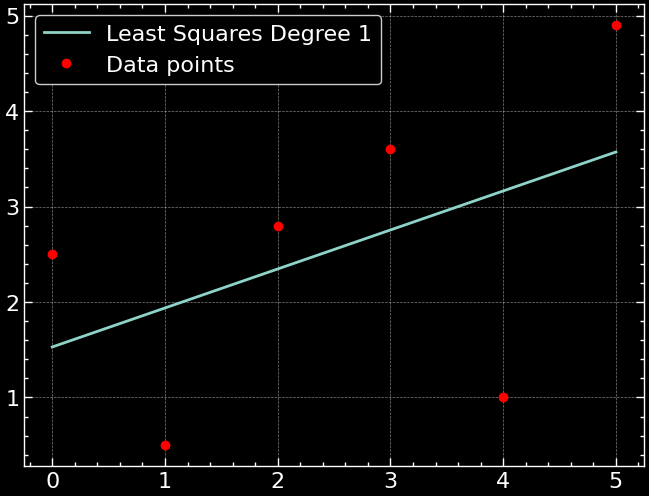

In [18]:

# Example usage
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2.5, 0.5, 2.8, 3.6, 1.0, 4.9])
degree = 1

# Fit the polynomial
coeffs = least_squares_fit(x, y, degree)
print(f'Coefficients of the fitted polynomial: {coeffs}')

# Generate points for plotting the fitted curve
xi = np.linspace(min(x), max(x), 100)
yi = evaluate_polynomial(coeffs, xi)

# Plot the original data and the fitted curve
plt.plot(xi, yi, label=f'Least Squares Degree {degree}')
plt.plot(x, y, 'ro', label='Data points')
plt.legend()
plt.show()
